In [69]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import tree

In [2]:
boston = load_boston()

C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
import pandas as pd

data = pd.concat([pd.DataFrame(boston.data), pd.DataFrame(boston.target)], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
train_X,test_X,train_Y,test_Y = train_test_split(boston.data,
                                                 boston.target,
                                                 test_size=0.3, random_state=3)

In [158]:
# 實例化
regressor = tree.DecisionTreeRegressor(criterion='friedman_mse',
                                       splitter='best',
                                       min_samples_split=5
                                      )

In [159]:
regressor = regressor.fit(train_X, train_Y)
score_train = regressor.score(train_X, train_Y)
print(score_train)
score_test = regressor.score(test_X, test_Y)
print(score_test)

0.992759614493711
0.7127667844483125


In [160]:
regressor.feature_importances_

array([2.51180832e-02, 1.64606462e-04, 7.90788632e-03, 6.38261277e-04,
       8.52473204e-03, 2.52952484e-01, 1.42631846e-02, 1.14883724e-01,
       9.10448109e-04, 1.10290614e-02, 9.19551079e-03, 4.15188616e-03,
       5.50260131e-01])

In [161]:
list(zip(boston.feature_names, regressor.feature_importances_))

[('CRIM', 0.02511808320778867),
 ('ZN', 0.0001646064624042263),
 ('INDUS', 0.007907886319831423),
 ('CHAS', 0.0006382612768536173),
 ('NOX', 0.00852473203737135),
 ('RM', 0.2529524844818129),
 ('AGE', 0.014263184553396868),
 ('DIS', 0.11488372442356591),
 ('RAD', 0.0009104481092698588),
 ('TAX', 0.011029061414061129),
 ('PTRATIO', 0.00919551079375608),
 ('B', 0.004151886159923745),
 ('LSTAT', 0.5502601307599644)]

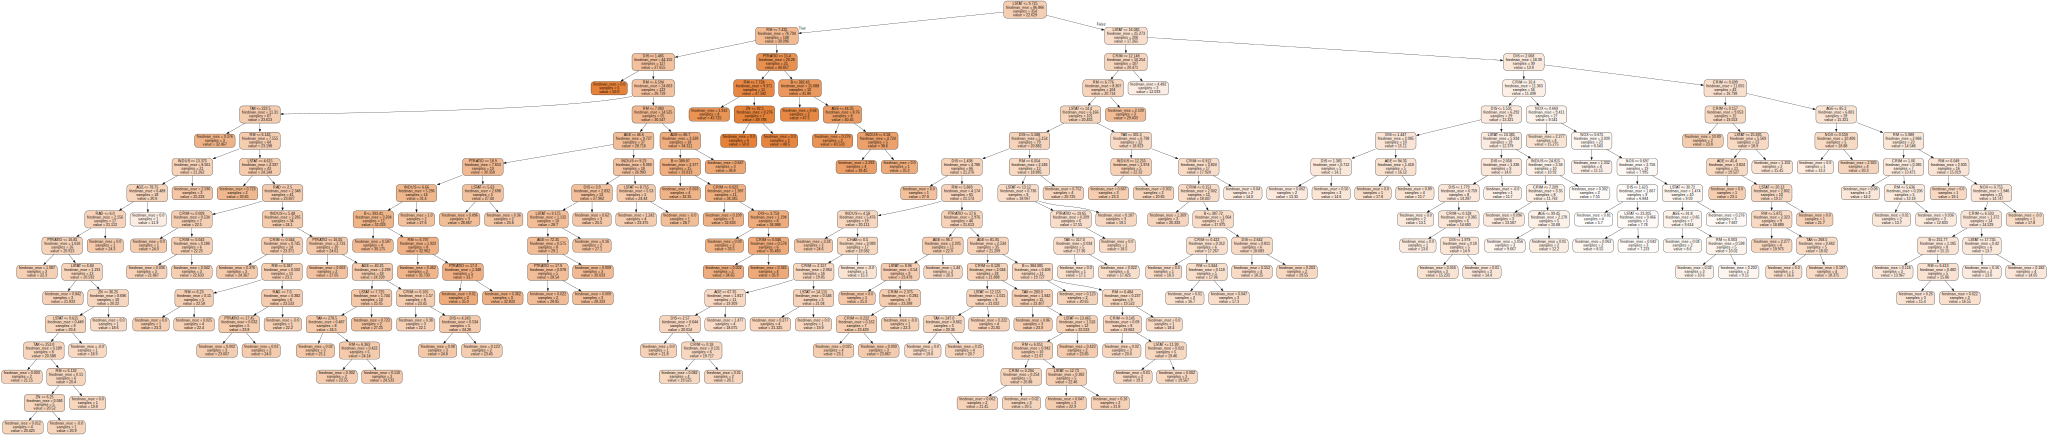

In [162]:
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

import graphviz

dot_data = tree.export_graphviz(regressor, 
                                feature_names = feature_name,  
                                filled=True, 
                                rounded=True)

graph = graphviz.Source(dot_data)
graph

In [146]:
# 交叉驗證, cv=10, 將資料集分10份每次取1份(不重複)做測試, 總共取十次, scoring預設為R^2, R^2越接近1越好
# 藉由多次計算模型的精确性来評估模型的平均準確程度, 避免固定切分數據集時造成評估模型精準度的誤差, 更好的調整模型超參數
scores = cross_val_score(regressor, boston.data, boston.target, cv=10, 
                         #scoring = "neg_mean_squared_error"
                        )

In [135]:
print(scores)

[ 0.49974716  0.56465345 -1.80949591  0.50855501  0.75992755  0.19772801
 -0.184035    0.3495667  -2.12604791 -0.30898218]


In [136]:
print(scores.mean())

-0.15483831224136022


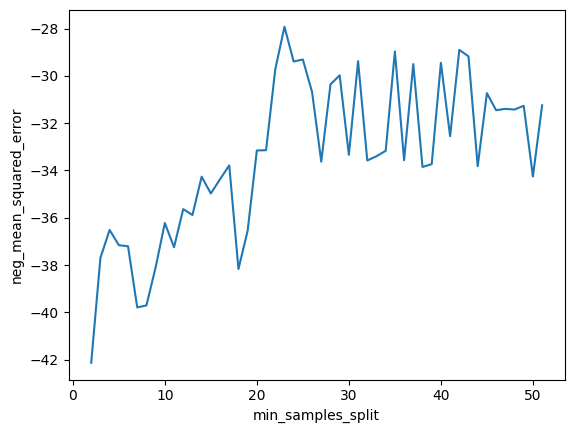

In [173]:
import matplotlib.pyplot as plt

scores_list = []
for i in range(1, 51):
    regressor = tree.DecisionTreeRegressor(criterion="friedman_mse",
                                           splitter="best",
                                           min_samples_split=i+1
                                           )
    regressor = regressor.fit(train_X, train_Y)
    scores = cross_val_score(regressor, boston.data, boston.target, cv=10, 
                             scoring = "neg_mean_squared_error"
                             )
    scores_list.append(scores.mean())

plt.figure()
plt.plot(range(2, 52), scores_list)
plt.ylabel("neg_mean_squared_error")
plt.xlabel("min_samples_split")
plt.show()

In [174]:
regressor_mod = tree.DecisionTreeRegressor(criterion='friedman_mse',
                                       splitter='best',
                                       min_samples_split=23
                                      )

regressor_mod = regressor_mod.fit(train_X, train_Y)
score_train_mod = regressor_mod.score(train_X, train_Y)
print(score_train_mod)
score_test_mod = regressor_mod.score(test_X, test_Y)
print(score_test_mod)

0.9406319501766954
0.7739112442784016


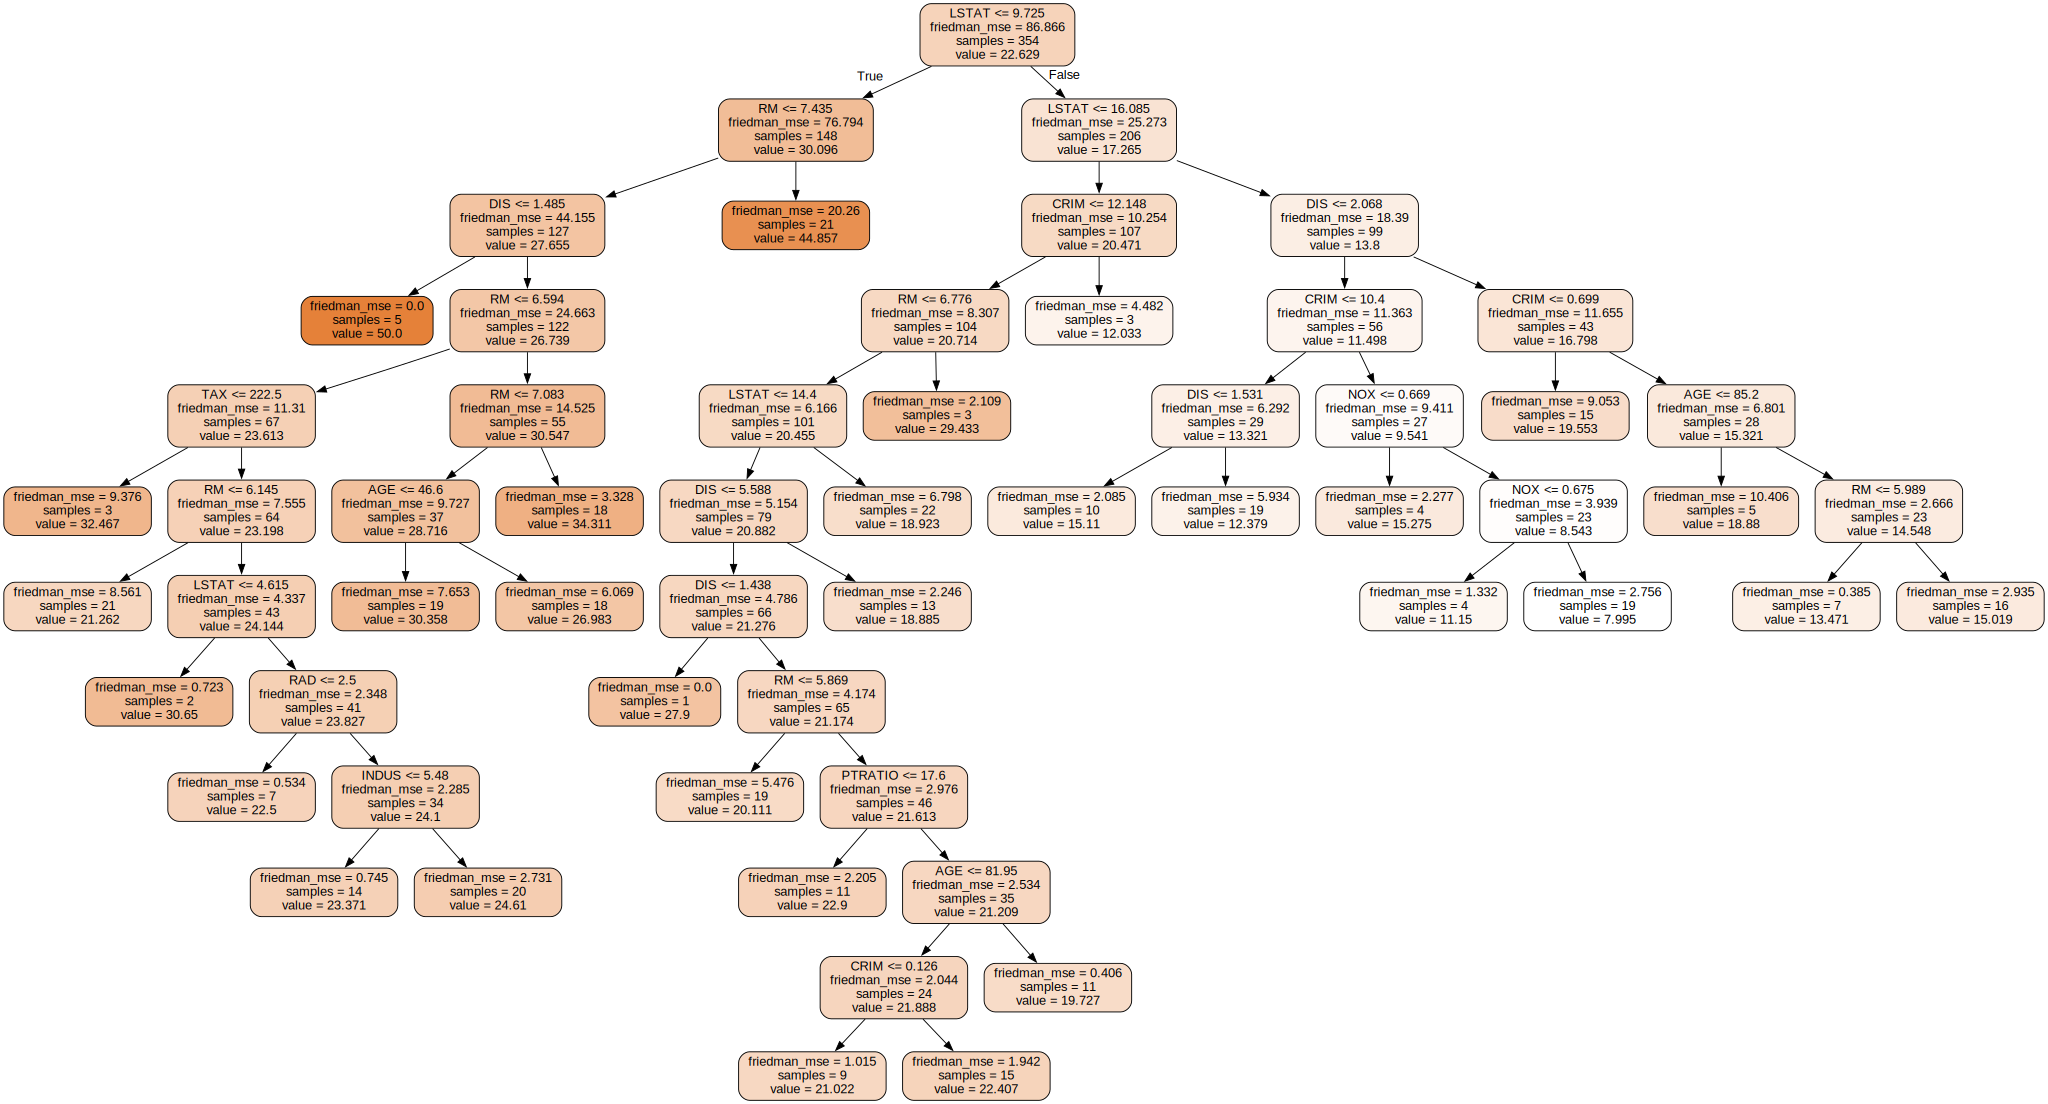

In [175]:
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

dot_data_mod = tree.export_graphviz(regressor_mod, 
                                feature_names = feature_name,  
                                filled=True, 
                                rounded=True)

graph_mod = graphviz.Source(dot_data_mod)
graph_mod

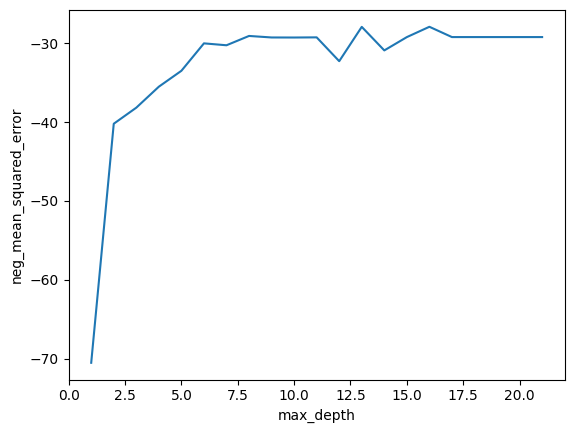

In [182]:
scores_list = []
for i in range(1, 22):
    regressor = tree.DecisionTreeRegressor(criterion="friedman_mse",
                                           splitter="best",
                                           max_depth=i,
                                           min_samples_split=23
                                           )
    regressor = regressor.fit(train_X, train_Y)
    scores = cross_val_score(regressor, boston.data, boston.target, cv=10, 
                             scoring = "neg_mean_squared_error"
                             )
    scores_list.append(scores.mean())

plt.figure()
plt.plot(range(1, 22), scores_list)
plt.ylabel("neg_mean_squared_error")
plt.xlabel("max_depth")
plt.show()

In [183]:
regressor_mod2 = tree.DecisionTreeRegressor(criterion='friedman_mse',
                                           splitter='best',
                                           max_depth=10,
                                           min_samples_split=23
                                          )

regressor_mod2 = regressor_mod2.fit(train_X, train_Y)
score_train_mod2 = regressor_mod2.score(train_X, train_Y)
print(score_train_mod2)
score_test_mod2 = regressor_mod2.score(test_X, test_Y)
print(score_test_mod2)

0.940281341760935
0.7764295399037602


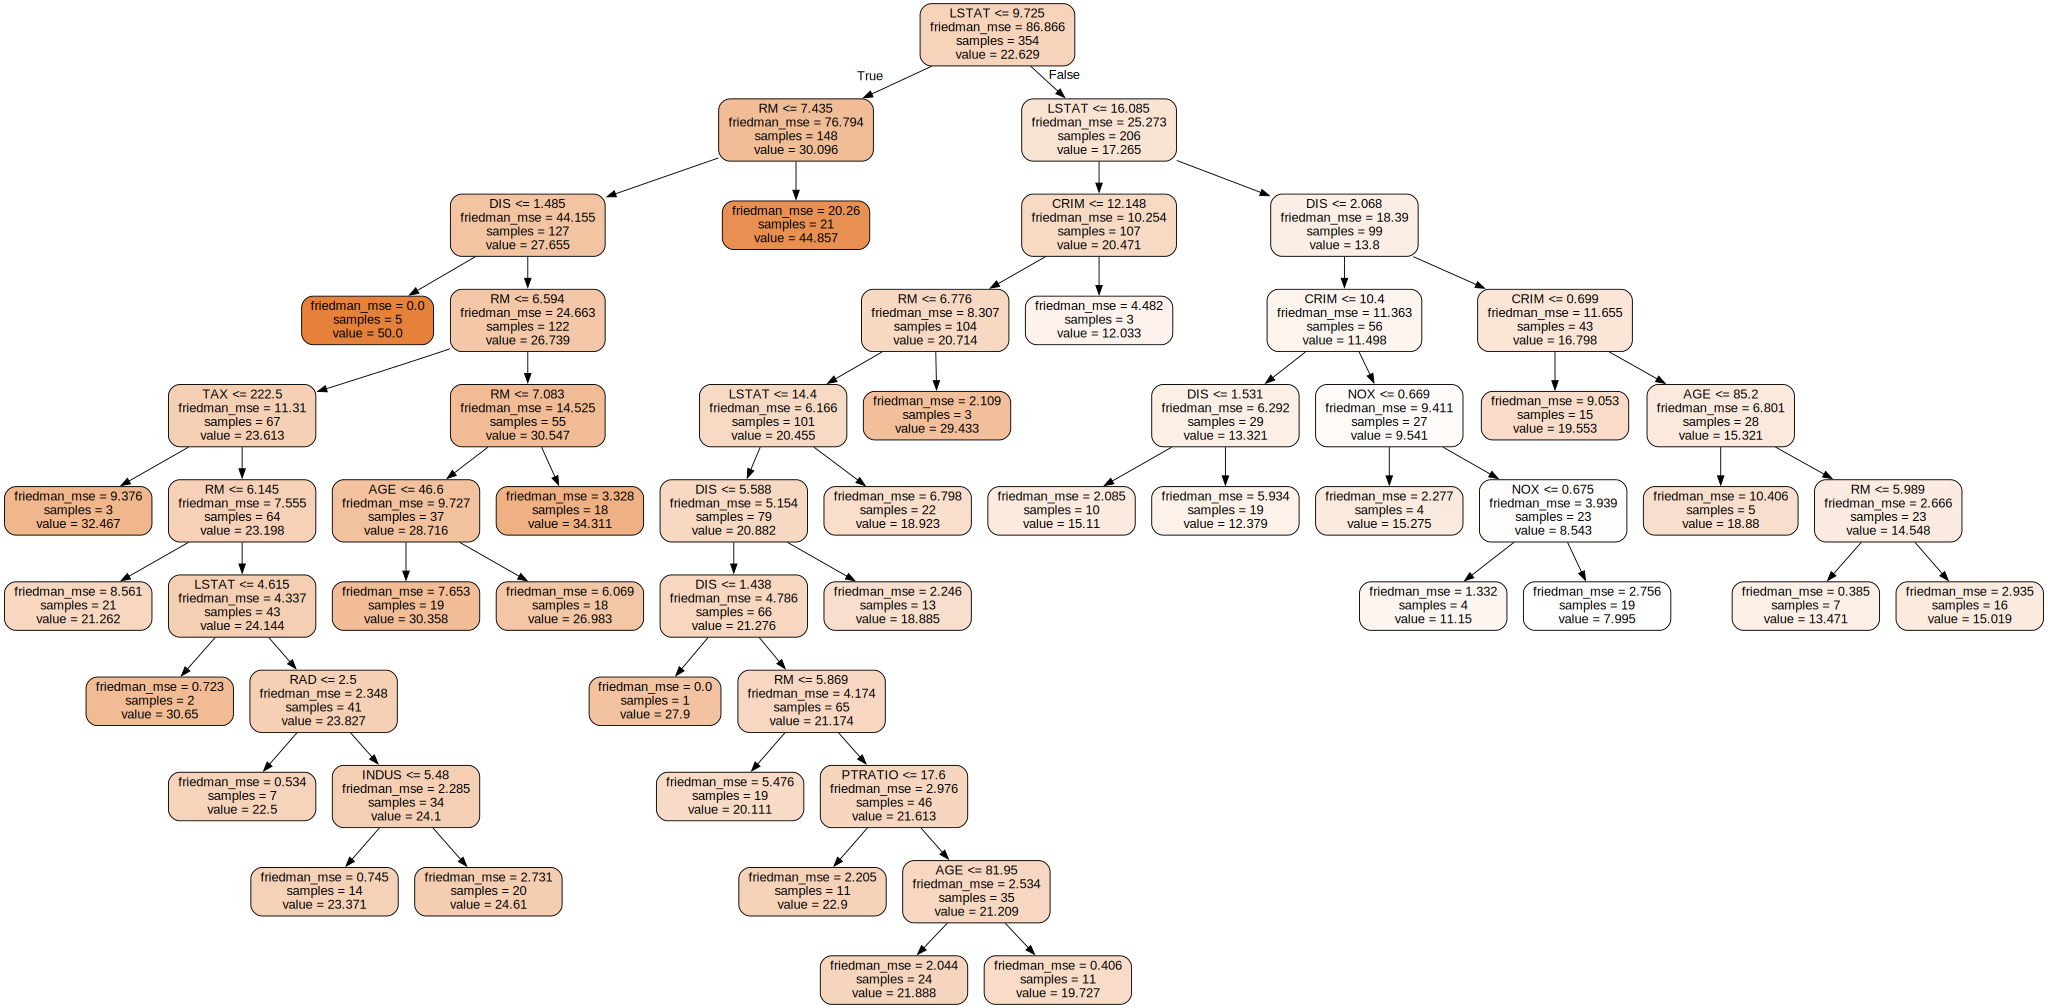

In [184]:
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

dot_data_mod2 = tree.export_graphviz(regressor_mod2, 
                                feature_names = feature_name,  
                                filled=True, 
                                rounded=True)

graph_mod2 = graphviz.Source(dot_data_mod2)
graph_mod2

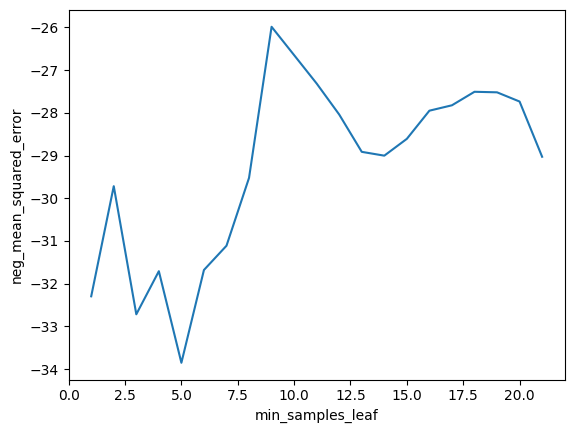

In [187]:
scores_list = []
for i in range(1, 22):
    regressor = tree.DecisionTreeRegressor(criterion="friedman_mse",
                                           splitter="best",
                                           max_depth=10,
                                           min_samples_split=23,
                                           min_samples_leaf=i
                                           )
    regressor = regressor.fit(train_X, train_Y)
    scores = cross_val_score(regressor, boston.data, boston.target, cv=10, 
                             scoring = "neg_mean_squared_error"
                             )
    scores_list.append(scores.mean())

plt.figure()
plt.plot(range(1, 22), scores_list)
plt.ylabel("neg_mean_squared_error")
plt.xlabel("min_samples_leaf")
plt.show()

In [196]:
regressor_mod3 = tree.DecisionTreeRegressor(criterion='friedman_mse',
                                           splitter='best',
                                           max_depth=10,
                                           min_samples_split=23,
                                           min_samples_leaf=8
                                          )

regressor_mod3 = regressor_mod3.fit(train_X, train_Y)
score_train_mod3 = regressor_mod3.score(train_X, train_Y)
print(score_train_mod3)
score_test_mod3 = regressor_mod3.score(test_X, test_Y)
print(score_test_mod3)

0.8925631169615543
0.7496996444152161


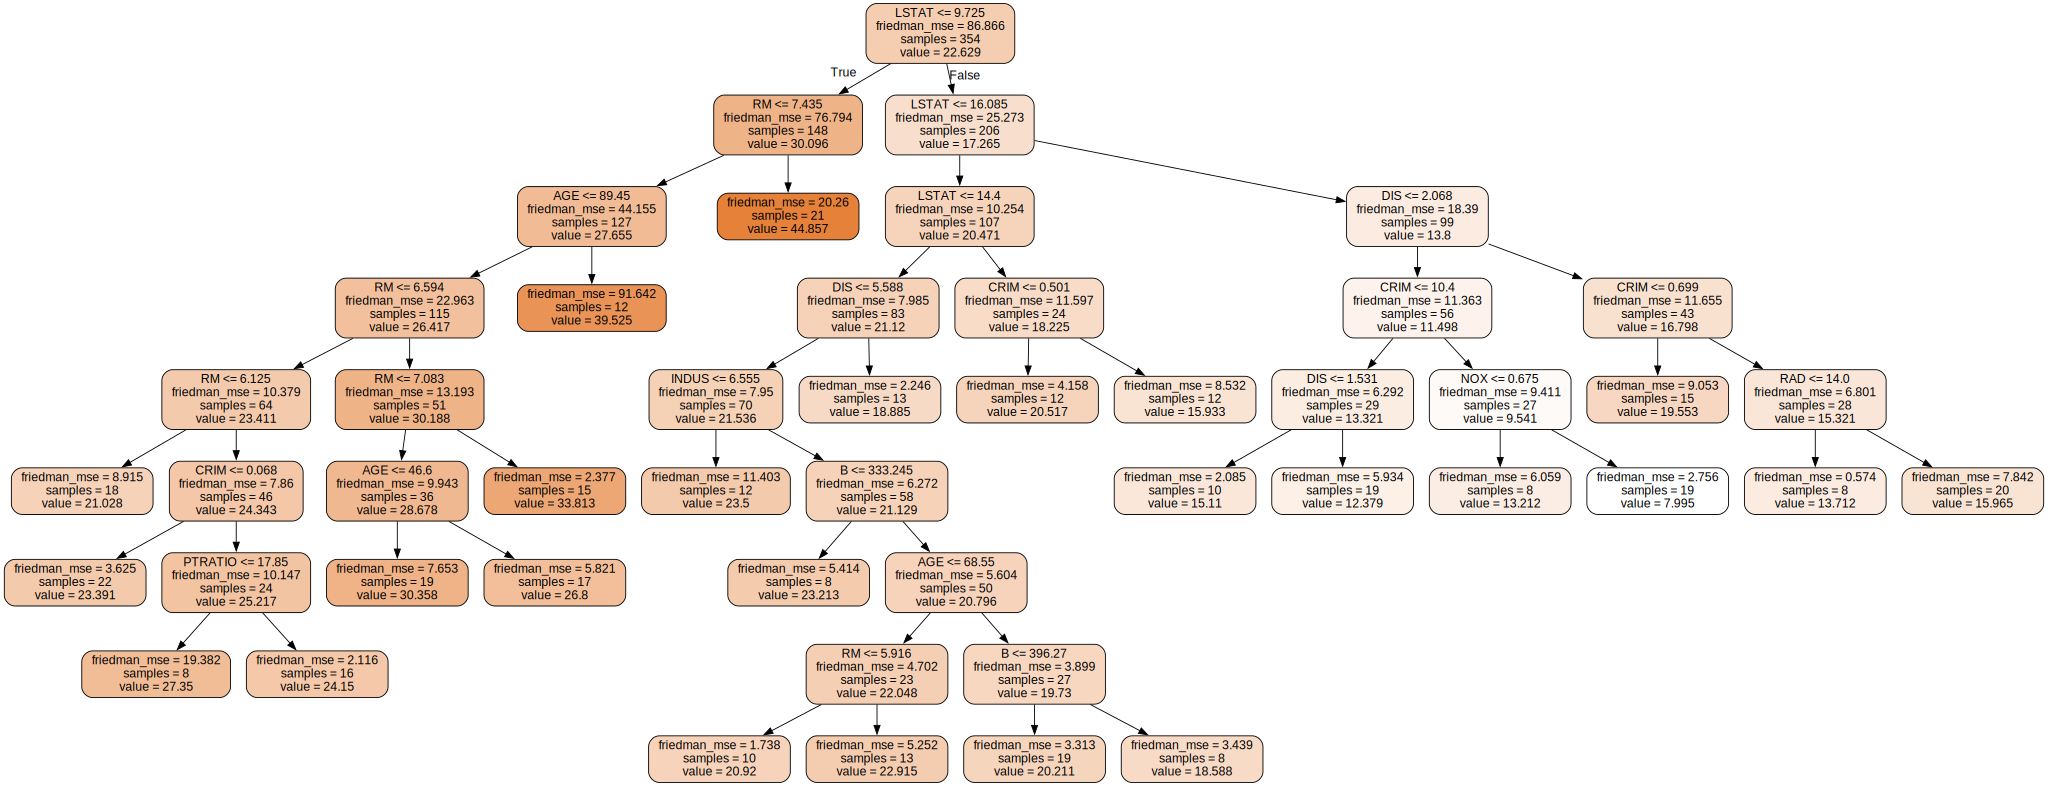

In [197]:
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

dot_data_mod3 = tree.export_graphviz(regressor_mod3, 
                                feature_names = feature_name,  
                                filled=True, 
                                rounded=True)

graph_mod3 = graphviz.Source(dot_data_mod3)
graph_mod3